Perform partitioning, hierarchical, and density-based clustering algorithms on a 
downloaded dataset and evaluate the cluster quality by changing the algorithm's 
parameters.

In [4]:
import numpy as np 
import pandas as pd 
import sklearn as sk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# PreProcessing

In [5]:
data = pd.read_csv("db/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print(data.Outcome.unique(), "--> binary taget Value")

[1 0] --> binary taget Value


In [9]:
y_true = data.Outcome
data = data.drop("Outcome",axis=1)

as there are a lots of outliers in insulin column so we will remove this column that and maintain the dataset length


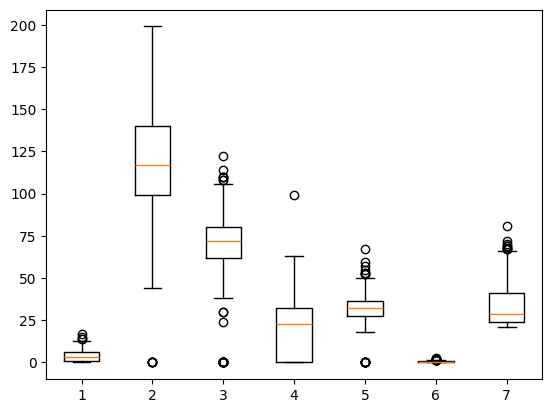

In [10]:
print(f"as there are a lots of outliers in insulin column so we will remove this column that and maintain the dataset length")

plt.boxplot(data.drop("Insulin",axis=1))
plt.show()

data = data.drop("Insulin",axis=1)

### problem

In [11]:
import numpy as np

# Given z-scores
xp = np.array([[-0.82048372],
               [-0.25850857],
               [-1.21386632],
               [ 0.86544173],
               [ 1.42741688]])

# Calculate the mean
mean_xp = np.sum(xp) / len(xp)

# Print the mean
print("Mean of the z-scores:", mean_xp)


Mean of the z-scores: 8.881784197001253e-17


# Clustring on Different Algorithm

## partitioning clustering

[1429147.7985355605, 905420.7503135485, 768049.2378301019, 607260.5031354208, 528384.2192979497, 484520.3244315469, 451226.48684181337, 420014.4709301087, 393724.47633745556, 370696.847912743]


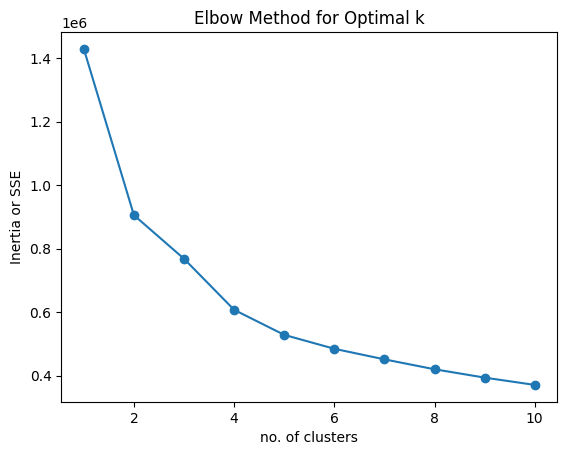

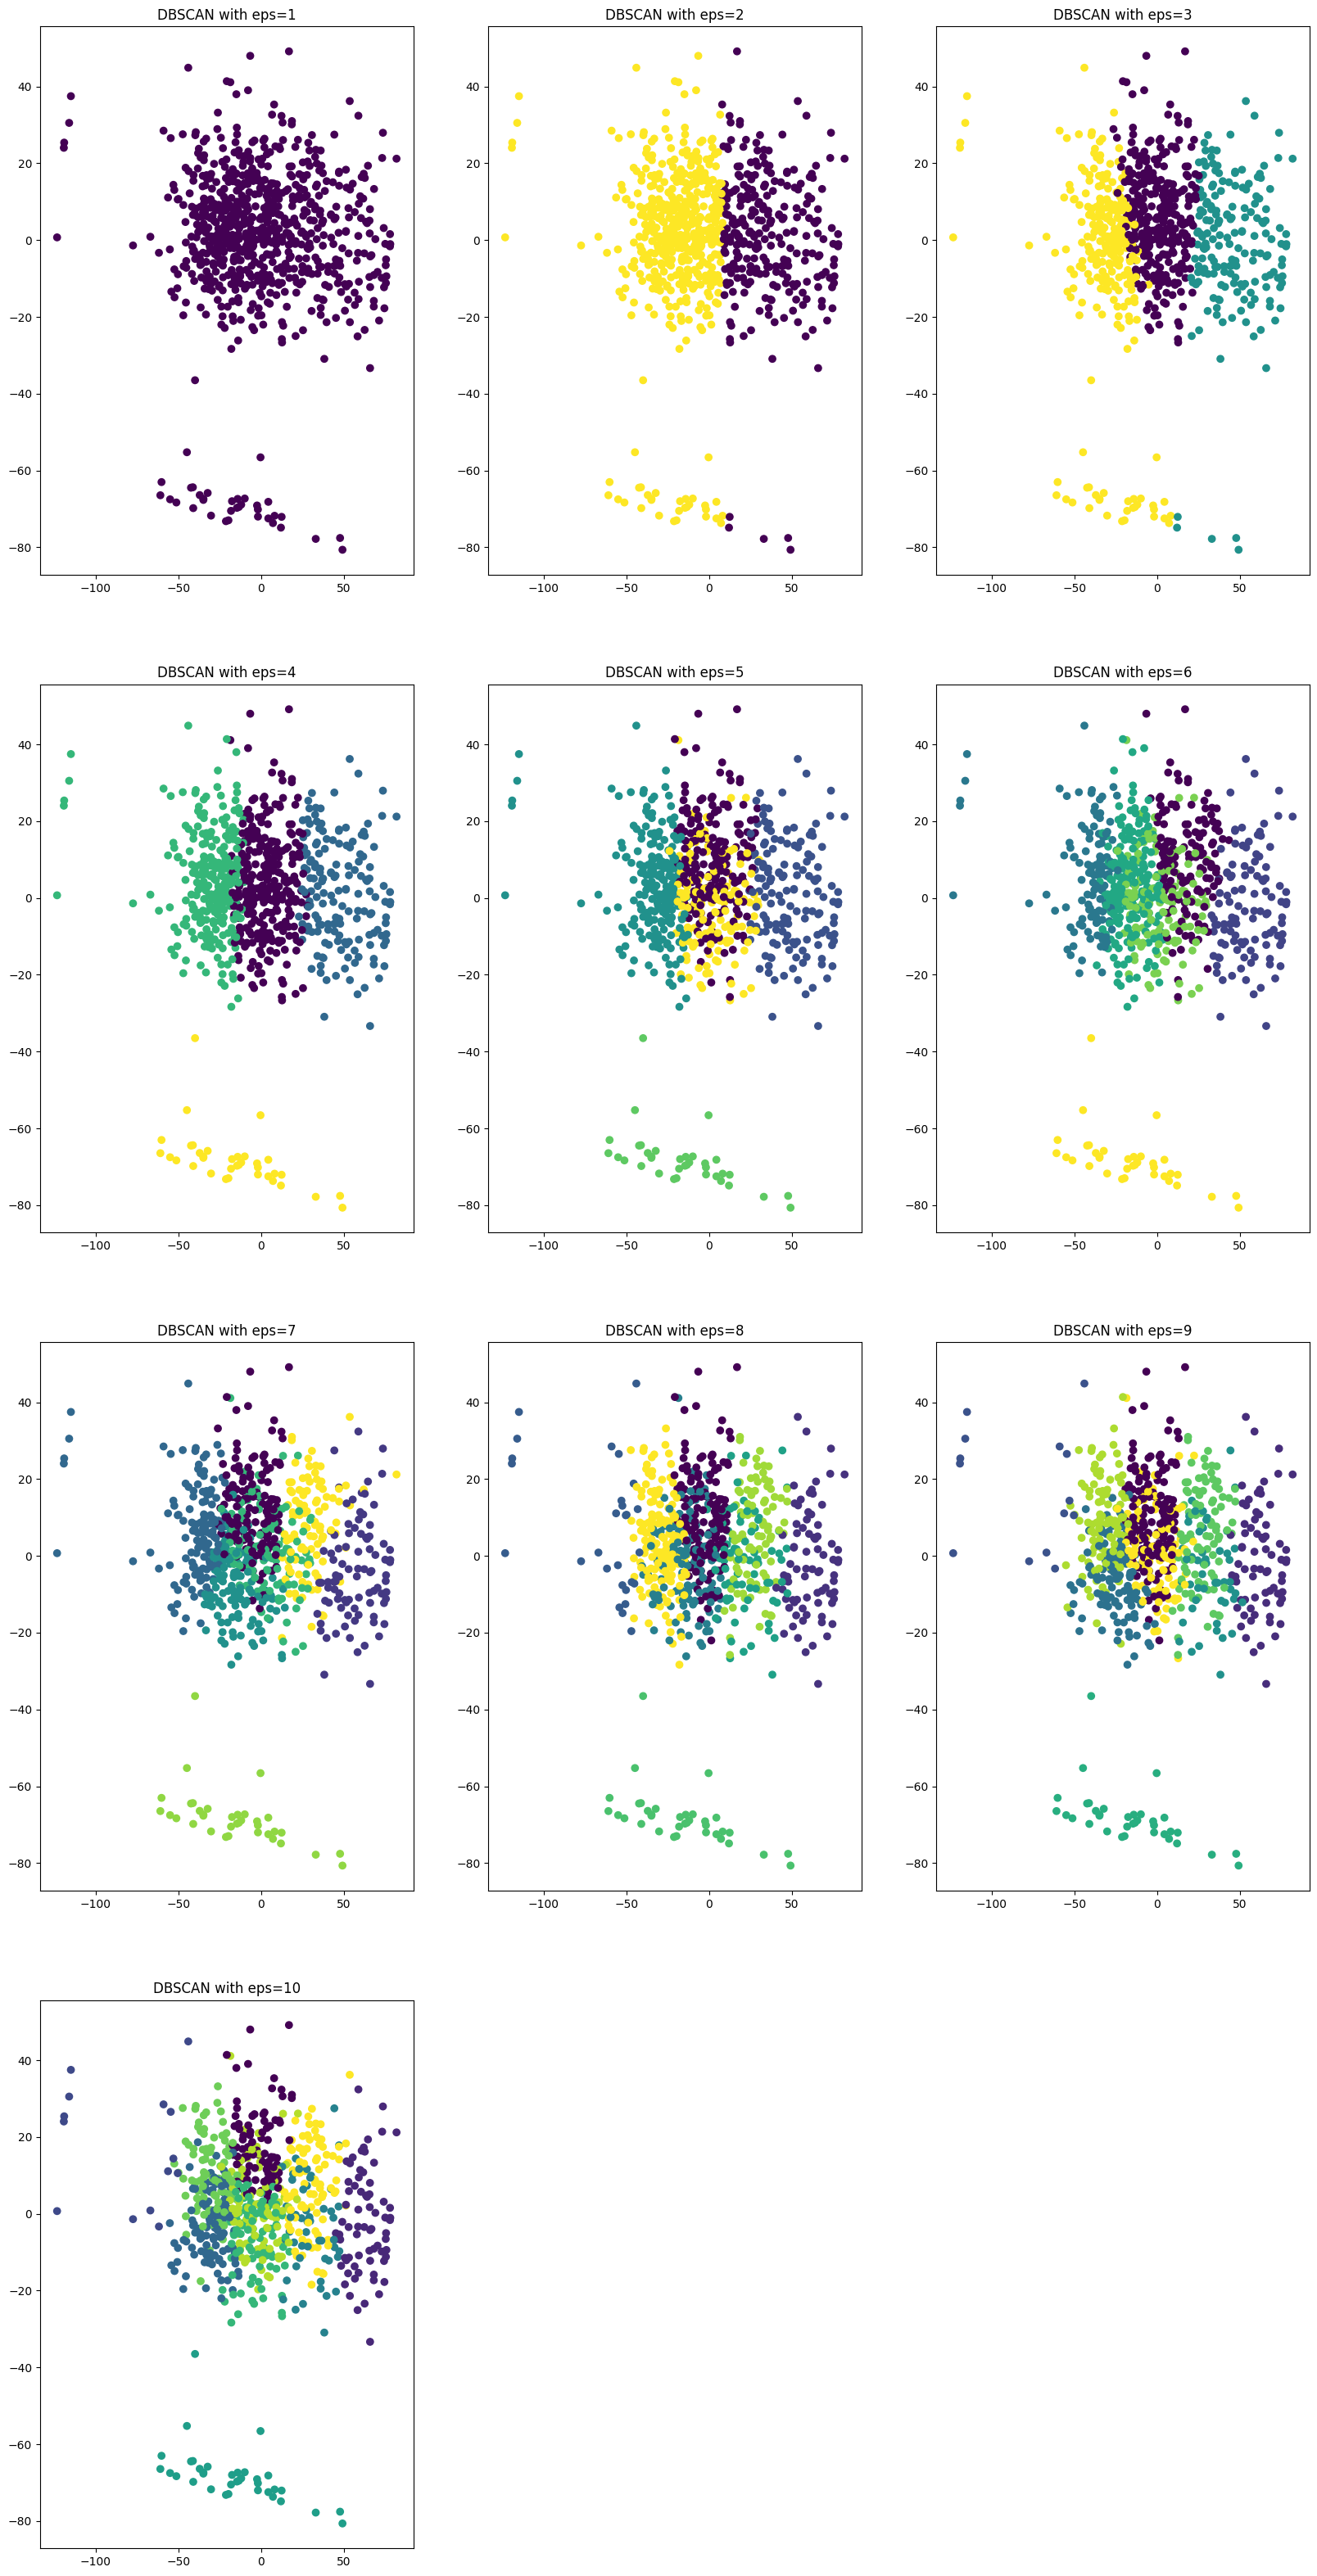

In [12]:
# Fit K-Means with different number of clusters
k_values = range(1, 11)
inertia = []
kmean_clusters= []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    clusters = kmeans.fit_predict(data)
    kmean_clusters.append(clusters)
    inertia.append(kmeans.inertia_)
print(inertia)

# Plotting the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('no. of clusters')
plt.ylabel('Inertia or SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

pca = PCA(n_components=2)
data2d = pca.fit_transform(data)
plt.figure(figsize=(20,40))
for i,k in enumerate(k_values):
    plt.subplot(len(k_values)//3+1,3, i+1)
    plt.scatter(data2d[:, 0], data2d[:, 1], c=kmean_clusters[i])
    plt.title(f'DBSCAN with eps={k}')
plt.show()




## Hierarchical Clustering

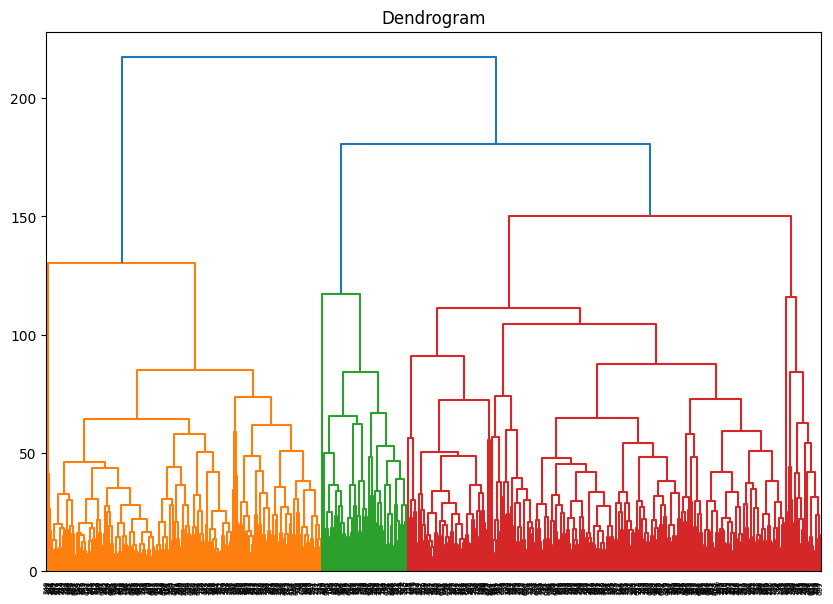

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# Compute the linkage matrix
Z = linkage(data, 'complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.show()




In [14]:
len((Z[:,3]))

767

## Density-Based Clustering (DBSCAN)

average distance between data points: 54.98299768282033


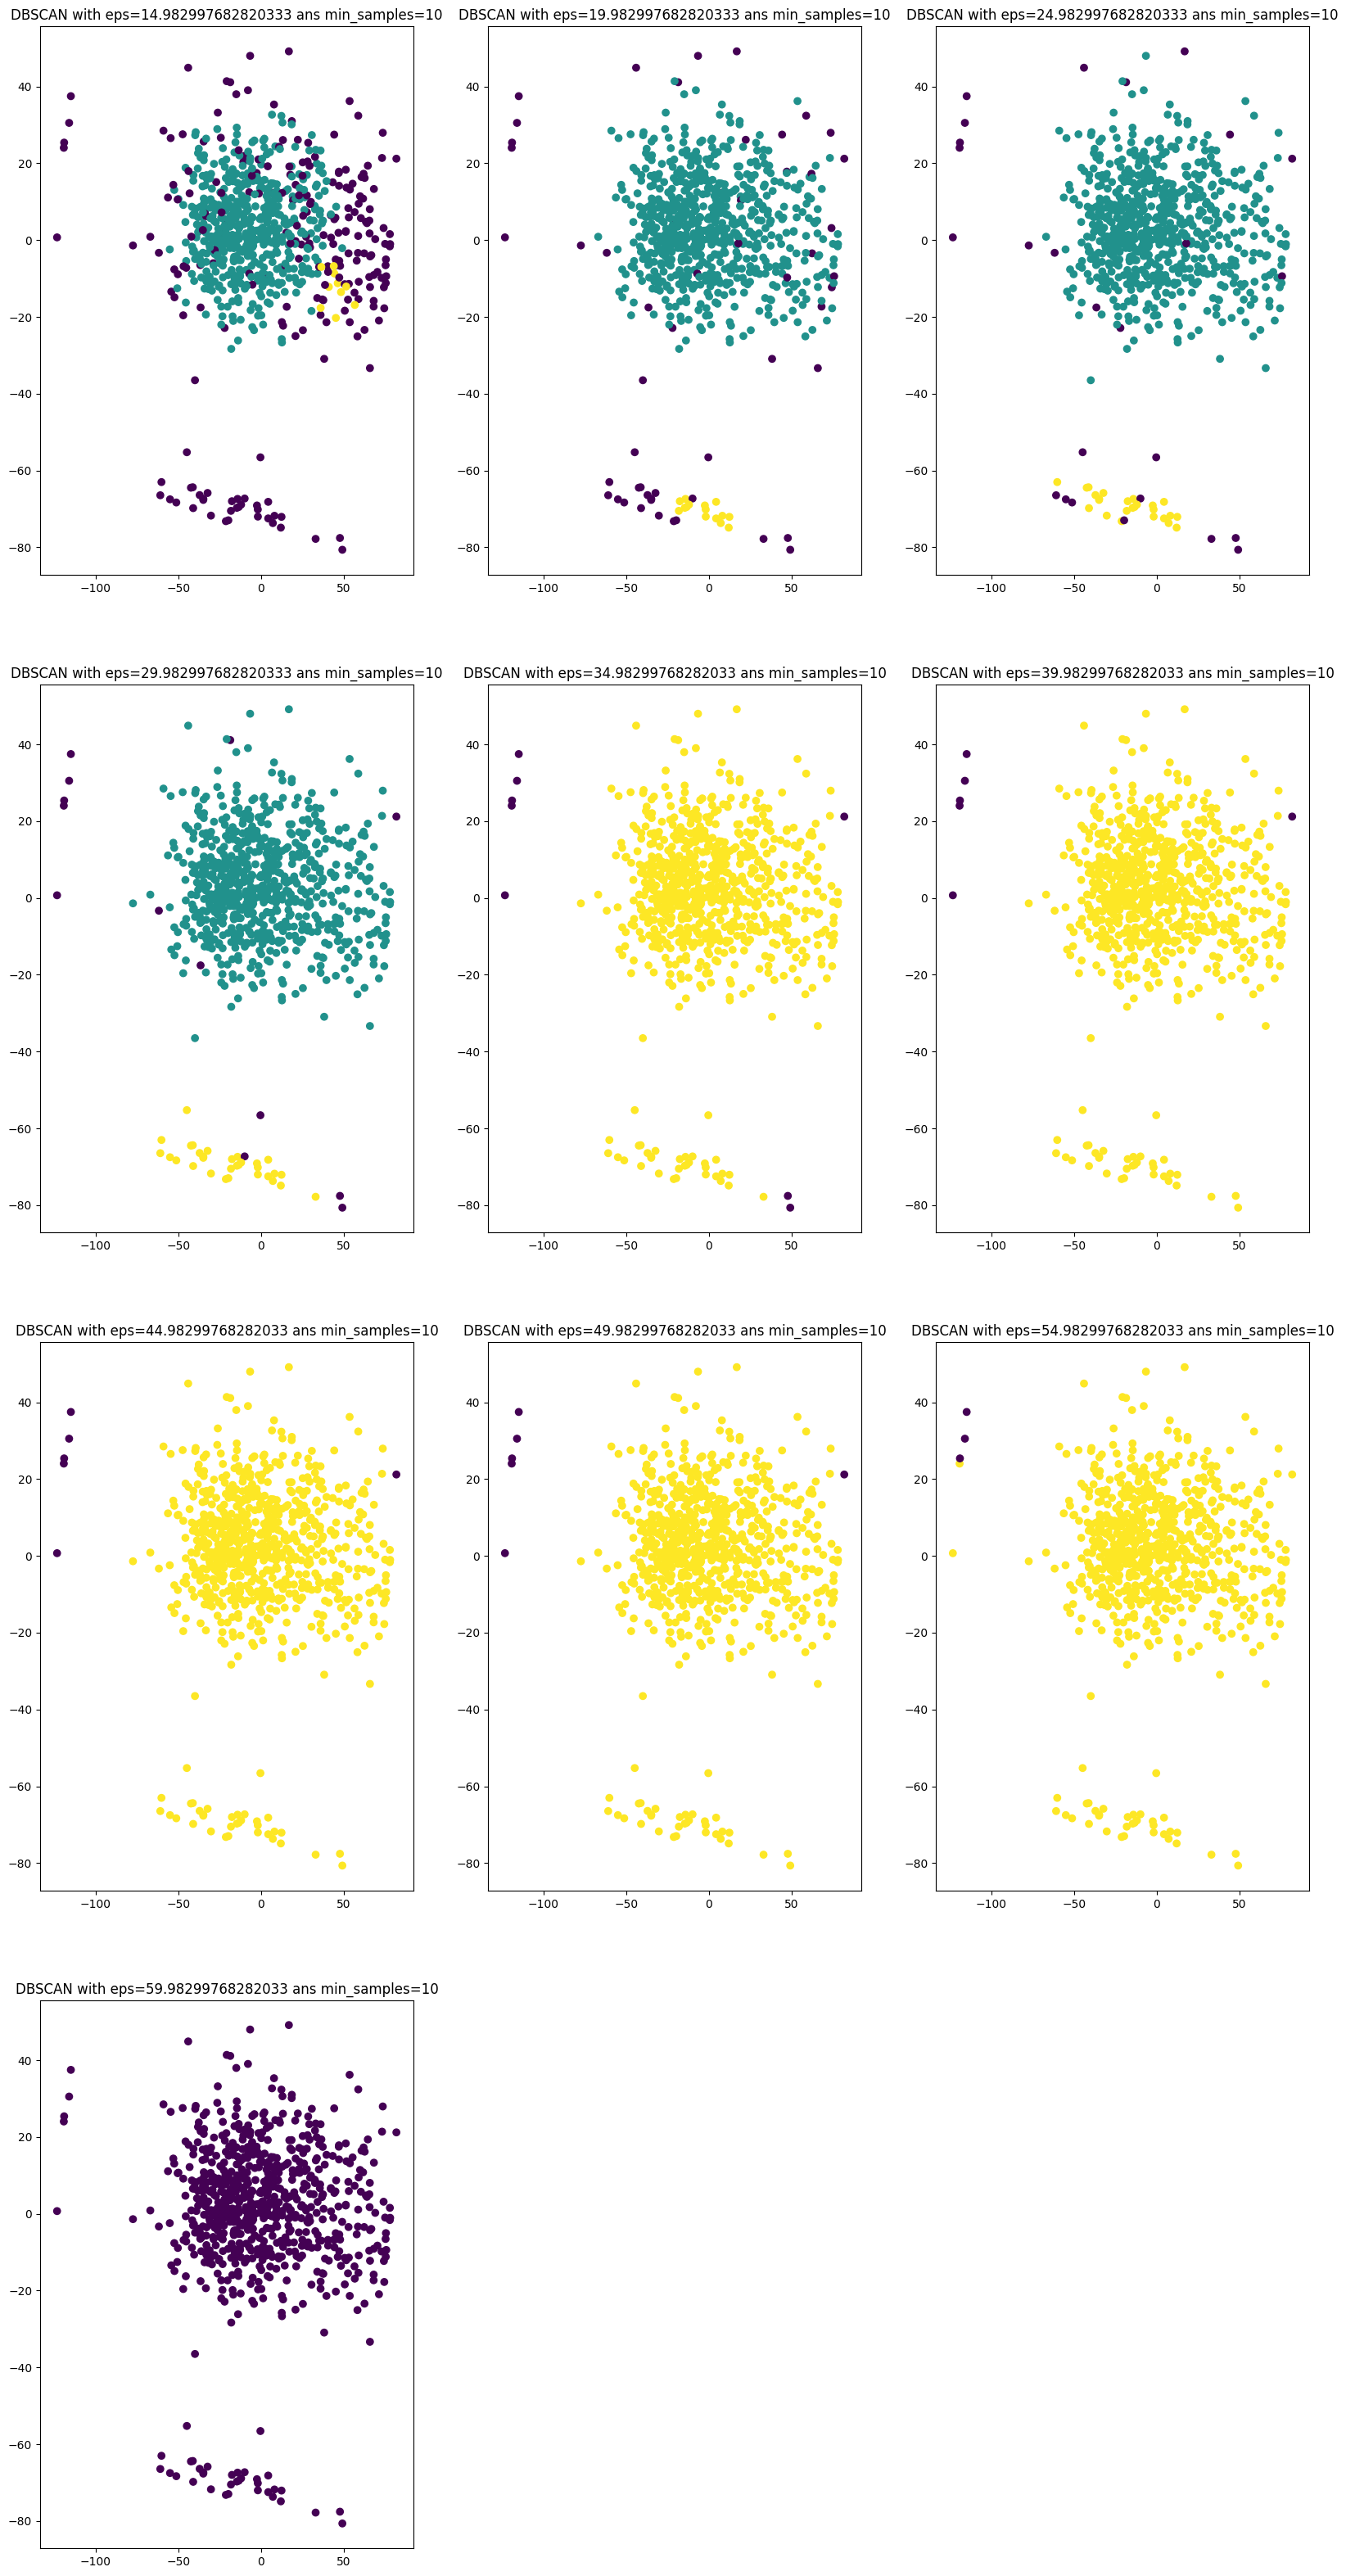

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

proximity_matrix_euclidean = pairwise_distances(data,metric='euclidean')
avg_dist = proximity_matrix_euclidean.mean()
print(f"average distance between data points: {avg_dist}")
proximity_matrix_euclidean

# # Fit DBSCAN with different parameters
eps_values = [avg_dist+i for i in range(-40,10,5)]
min_samples = 10
dbscan_clusters=[]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    dbscan_clusters.append(clusters)

pca = PCA(n_components=2)
data2d = pca.fit_transform(data)
plt.figure(figsize=(20,40))
for i,eps in enumerate(eps_values):
    plt.subplot(len(eps_values)//3+1,3, i+1)
    plt.scatter(data2d[:, 0], data2d[:, 1], c=dbscan_clusters[i], cmap='viridis')
    plt.title(f'DBSCAN with eps={eps} ans min_samples={min_samples}')
plt.show()

# len(DBSCAN(eps=eps_values[0],min_samples=min_samples).fit_predict(data))

# Evaluating Quality

In [16]:
from sklearn.metrics import confusion_matrix
if np.all(kmean_clusters == -1):
    print("all points are identified as noise")
else:
    kmeans_mask = (kmean_clusters[3]!=-1)
    kmeans_pred = (kmean_clusters[3][kmeans_mask]==1).astype(int)

    dbscan_mask = (dbscan_clusters[3]!=-1)
    dbscan_pred = (dbscan_clusters[3][dbscan_mask]==1).astype(int)

kmeans_cm = confusion_matrix(y_true[kmeans_mask],kmeans_pred)
dbscan_cm = confusion_matrix(y_true[dbscan_mask],dbscan_pred)

print(kmeans_cm)
print("--------------------")
print(dbscan_cm)


[[455  45]
 [149 119]]
--------------------
[[476  18]
 [248  13]]


## Precision

precision of Kmeans : 0.91
precision of dbscan : 0.952


<BarContainer object of 2 artists>

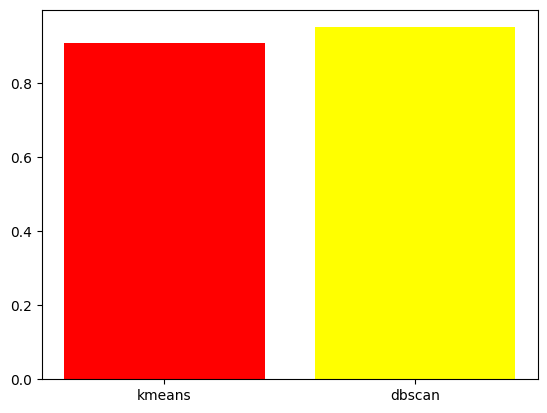

In [34]:
kmeans_precision = kmeans_cm[0,0]/(kmeans_cm[0,0] + kmeans_cm[0,1])
dbscan_precision = dbscan_cm[0,0]/(kmeans_cm[0,0] + kmeans_cm[0,1])
print(f'precision of Kmeans : {kmeans_precision}')
print(f'precision of dbscan : {dbscan_precision}')

plt.bar(["kmeans", "dbscan"], [kmeans_precision, dbscan_precision], color=["red","yellow"])

## Recall

precision of Kmeans : 0.7926829268292683
precision of dbscan : 0.8292682926829268


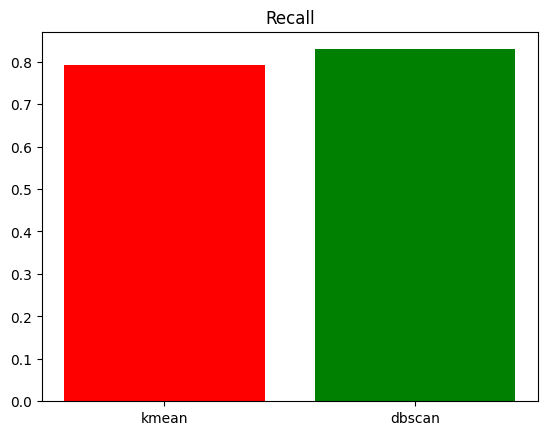

In [31]:
kmeans_recall = kmeans_cm[0,0]/(kmeans_cm[0,0] + kmeans_cm[1,1])
dbscan_recall = dbscan_cm[0,0]/(kmeans_cm[0,0] + kmeans_cm[1,1])
print(f'precision of Kmeans : {kmeans_recall}')
print(f'precision of dbscan : {dbscan_recall}')

plt.title("Recall")
plt.bar(["kmean","dbscan"],[kmeans_recall, dbscan_recall], color=["red","green"])
plt.show()

## Purity

Purity of Kmeans : 0.7864583333333334
Purity of dbscan : 0.9589403973509933


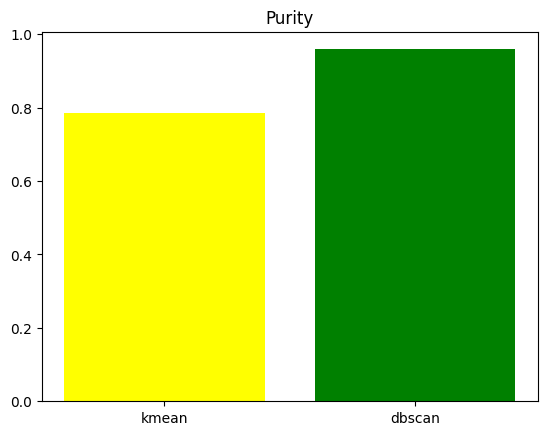

In [35]:
def calculate_purity_from_cm(conf_matrix):
    total_instances = np.sum(conf_matrix)  # Total number of instances
    max_in_clusters = np.sum(np.amax(conf_matrix, axis=1))  # Max per cluster
    purity = max_in_clusters / total_instances
    return purity

print(f'Purity of Kmeans : {calculate_purity_from_cm(kmeans_cm)}')
print(f'Purity of dbscan : {calculate_purity_from_cm(dbscan_cm)}')

plt.title("Purity")
plt.bar(["kmean","dbscan"],[calculate_purity_from_cm(model) for model in [kmeans_cm,dbscan_cm]], color=["yellow","green"])
plt.show()

## F1-Score

F1-Score of kmeans : 0.8472998137802609
F1-Score of dbscan : 0.8864059590316574


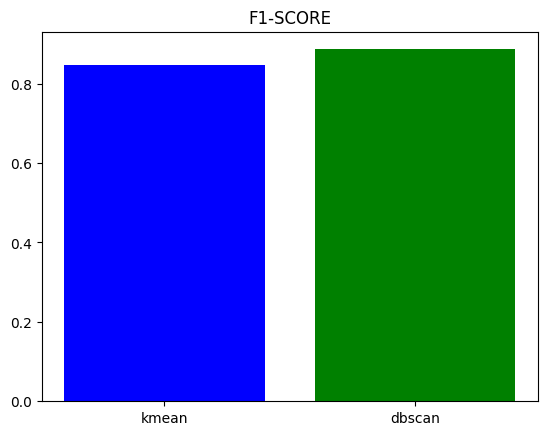

In [36]:
def F1_Score(precision, recall):
    return 2*((precision*recall) / (precision+recall))

kmean_F1 = F1_Score(kmeans_precision,kmeans_recall)
dbscan_F1= F1_Score(dbscan_precision,dbscan_recall)

print(f"F1-Score of kmeans : {kmean_F1}")
print(f"F1-Score of dbscan : {dbscan_F1}")

plt.title("F1-SCORE")
plt.bar(["kmean","dbscan"],[kmean_F1,dbscan_F1], color=["blue","green"])
plt.show()